# Wine Quality Analysis

## 01 Dataset Load

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest 

In [46]:
df_white = pd.read_csv("data/winequality-white.csv", delimiter=";")
df_red = pd.read_csv("data/winequality-red.csv", delimiter=";")

In [19]:
df_white["wine_type"] = "white"
df_red["wine_type"] = "red"

In [47]:
file_names = ["data/winequality-white.csv", "data/winequality-red.csv"]
df_list = []

for file in file_names:
    temp_df = pd.read_csv(file)
    df_list.append(temp_df)

df = pd.concat([df_white, df_red], axis=False)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [21]:
df.shape

(6497, 13)

In [22]:
df.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598],
      dtype='int64', length=6497)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


## 02 Data Types

In [24]:
df.dtypes.value_counts()

float64    11
int64       1
object      1
Name: count, dtype: int64

In [45]:
string_columns = df.select_dtypes(include="object").columns.tolist()
numeric_columns = df.select_dtypes(include="number").columns.tolist()

In [26]:
df.loc[:, numeric_columns].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [27]:
df.loc[:, string_columns].head()

,wine_type
0,white
1,white
2,white
3,white
4,white


In [28]:
normaltest(df.quality)

NormaltestResult(statistic=np.float64(50.358972216153944), pvalue=np.float64(1.1606148581928246e-11))

## 03 NaN Analysis

In [29]:
nan_counts = df.isna().sum()
nan_counts

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

## 04 General Analysis

In [30]:
df.loc[:, numeric_columns].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [31]:
df.loc[:, string_columns].describe()

,wine_type
count,6497
unique,2
top,white
freq,4898


In [32]:
df.groupby("wine_type")[["quality"]].mean().sort_values("quality", ascending=False)

,quality
wine_type,
white,5.877909
red,5.636023


Text(0, 0.5, 'count')

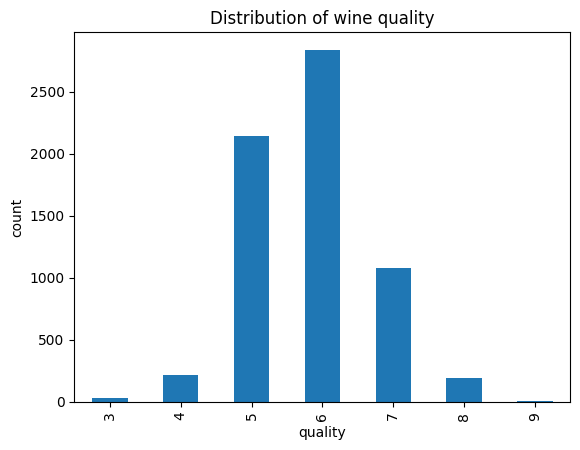

In [33]:
df.quality.value_counts().sort_index().plot(kind="bar")
plt.title("Distribution of wine quality")
plt.xlabel("quality")
plt.ylabel("count")

## 05 Target Column Analysis

Text(0, 0.5, 'density')

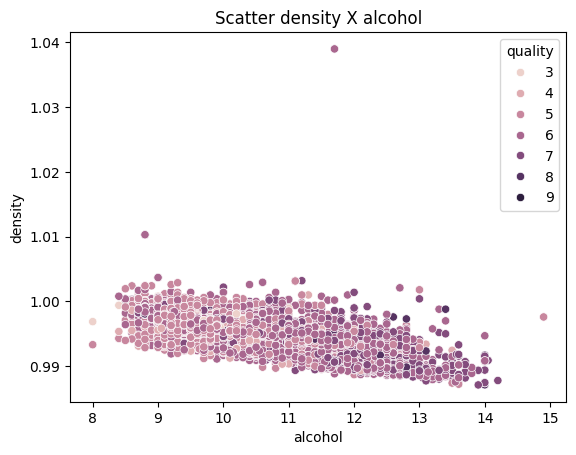

In [34]:
sns.scatterplot(data=df, x="alcohol", y="density", hue="quality")
plt.title("Scatter density X alcohol")
plt.xlabel("alcohol")
plt.ylabel("density")

<Axes: xlabel='alcohol', ylabel='Count'>

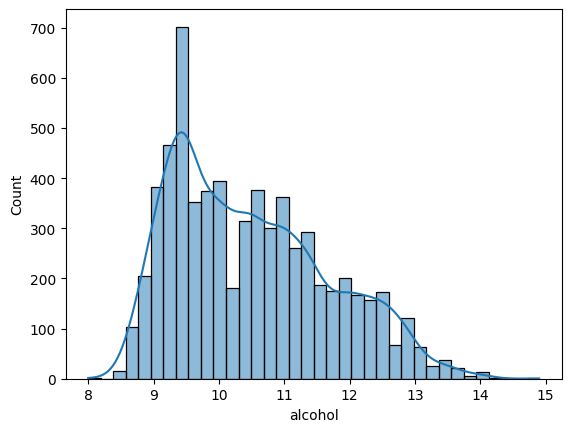

In [35]:
sns.histplot(df, x="alcohol", kde=True)

In [49]:
df["alcohol_bin"] = pd.cut(df["alcohol"], bins=range(int(df["alcohol"].min()), int(df["alcohol"].max()) + 2, 1))
df["density_bin"] = pd.cut(df["density"], bins=np.arange(df["density"].min(), df["density"].max() + 0.001, 0.001))

result = df.groupby(["alcohol_bin", "density_bin"], observed=False)["quality"].mean().unstack()
result_clean = result.dropna(how='all', axis=0).dropna(how='all', axis=1)

result_clean.style.background_gradient()


density_bin,"(0.987, 0.988]","(0.988, 0.989]","(0.989, 0.99]","(0.99, 0.991]","(0.991, 0.992]","(0.992, 0.993]","(0.993, 0.994]","(0.994, 0.995]","(0.995, 0.996]","(0.996, 0.997]","(0.997, 0.998]","(0.998, 0.999]","(0.999, 1.0]","(1.0, 1.001]","(1.001, 1.002]","(1.002, 1.003]","(1.003, 1.004]","(1.01, 1.011]","(1.038, 1.039]"
alcohol_bin,,,,,,,,,,,,,,,,,,,
"(8, 9]",nan,nan,nan,nan,nan,4.833333,5.333333,5.320000,5.051282,5.415094,5.645570,5.917431,5.582278,5.631579,5.750000,5.000000,6.000000,6.000000,nan
"(9, 10]",nan,nan,nan,nan,5.473684,5.500000,5.458333,5.405738,5.380488,5.391111,5.394256,5.505618,5.530435,5.405405,5.625000,6.000000,nan,nan,nan
"(10, 11]",nan,nan,5.000000,6.050000,5.895000,5.889632,5.880165,5.855204,5.803774,5.609375,5.717742,5.711864,5.692308,5.888889,6.000000,6.000000,nan,nan,nan
"(11, 12]",nan,5.500000,6.352113,6.192157,6.194553,6.058333,6.086614,6.138298,6.098901,6.282609,6.190476,6.636364,5.750000,5.625000,7.000000,nan,5.500000,nan,6.000000
"(12, 13]",nan,6.659091,6.546341,6.593939,6.525926,6.483333,6.458333,6.678571,6.500000,6.111111,6.750000,nan,7.000000,7.000000,5.666667,nan,nan,nan,nan
"(13, 14]",6.500000,6.777778,6.897436,6.562500,6.714286,6.000000,5.500000,6.500000,6.500000,6.000000,nan,7.000000,nan,nan,nan,nan,nan,nan,nan
"(14, 15]",7.000000,nan,nan,7.000000,nan,nan,nan,nan,nan,nan,5.000000,nan,nan,nan,nan,nan,nan,nan,nan


Text(0.5, 1.0, 'Boxplot graph quality X alcohol')

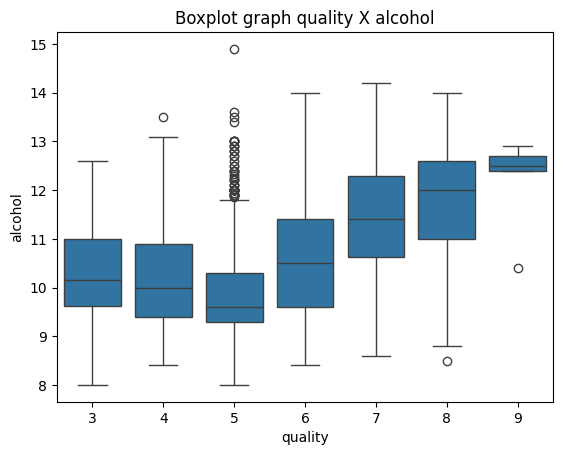

In [37]:
sns.boxplot(data=df, x="quality", y="alcohol")
plt.title("Boxplot graph quality X alcohol")

In [38]:
out_id = df.loc[((df.quality == 5) & (df.alcohol > 13)) | ((df.quality == 9) & (df.alcohol < 11))]
out_id

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,alcohol_bin,density_bin
774,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,white,"(10, 11]","(0.996, 0.997]"
3056,6.9,0.28,0.41,1.4,0.016,6.0,55.0,0.98876,3.16,0.40,13.4,5,white,"(13, 14]","(0.988, 0.989]"
3710,4.7,0.67,0.09,1.0,0.020,5.0,9.0,0.98722,3.30,0.34,13.6,5,white,"(13, 14]","(0.987, 0.988]"
3773,5.0,0.61,0.12,1.3,0.009,65.0,100.0,0.98740,3.26,0.37,13.5,5,white,"(13, 14]","(0.987, 0.988]"
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,red,"(14, 15]","(0.997, 0.998]"


Text(0.5, 1.0, 'Boxplot graph quality X alcohol')

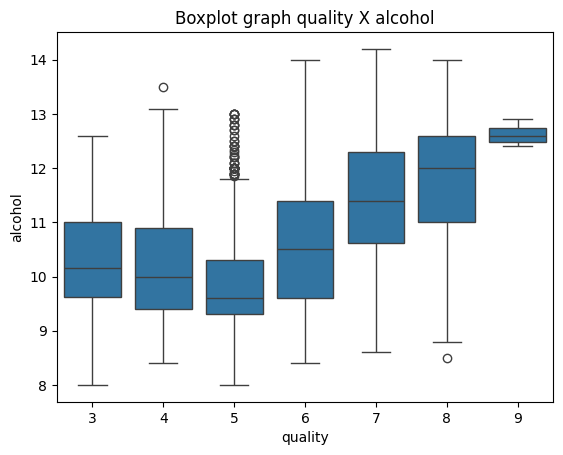

In [39]:
df_no_outliers = df.loc[~(((df.quality == 5) & (df.alcohol > 13)) | ((df.quality == 9) & (df.alcohol < 11)))]
sns.boxplot(data=df_no_outliers, x="quality", y="alcohol")
plt.title("Boxplot graph quality X alcohol")

### 05.1 Correlation Analysis

In [40]:
df_corr = df.loc[:, numeric_columns]
df_corr.corr(method="kendall")["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.352430
citric acid             0.082160
free sulfur dioxide     0.066713
pH                      0.025223
sulphates               0.023679
residual sugar         -0.013097
total sulfur dioxide   -0.042283
fixed acidity          -0.075990
volatile acidity       -0.199101
chlorides              -0.228872
density                -0.247978
Name: quality, dtype: float64

In [41]:
df_tree = df.loc[:, numeric_columns]

X = df_tree.drop("quality", axis=1)
y = df_tree["quality"]

model = RandomForestRegressor()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values()

print(importances.sort_values(ascending=False))

alcohol                 0.250993
volatile acidity        0.126808
free sulfur dioxide     0.091360
sulphates               0.077889
total sulfur dioxide    0.073832
residual sugar          0.072188
pH                      0.066686
chlorides               0.066173
density                 0.060237
citric acid             0.058309
fixed acidity           0.055525
dtype: float64


In [42]:
kendall_corr = df_corr.corr(method="kendall")["quality"].sort_index()
spearman_corr =df_corr.corr(method="spearman")["quality"].sort_index()

comparison_df = pd.DataFrame({
    "kendall_corr": kendall_corr,
    "spearman_corr": spearman_corr
})

comparison_df = comparison_df.sort_values(by="kendall_corr", ascending=False)

print(comparison_df)

                      kendall_corr  spearman_corr
quality                   1.000000       1.000000
alcohol                   0.352430       0.446925
citric acid               0.082160       0.105711
free sulfur dioxide       0.066713       0.086865
pH                        0.025223       0.032538
sulphates                 0.023679       0.029831
residual sugar           -0.013097      -0.016891
total sulfur dioxide     -0.042283      -0.054777
fixed acidity            -0.075990      -0.098154
volatile acidity         -0.199101      -0.257806
chlorides                -0.228872      -0.295054
density                  -0.247978      -0.322806


density                -0.247978
chlorides              -0.228872
volatile acidity       -0.199101
fixed acidity          -0.075990
total sulfur dioxide   -0.042283
residual sugar         -0.013097
sulphates               0.023679
pH                      0.025223
free sulfur dioxide     0.066713
citric acid             0.082160
alcohol                 0.352430
quality                 1.000000
Name: quality, dtype: float64


Text(0.5, 1.0, 'Correlation matrix (Kendall)')

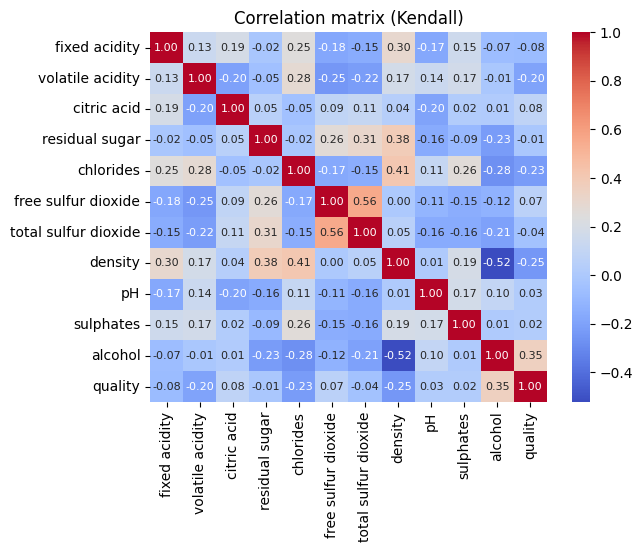

In [43]:
df_corr = df[numeric_columns]

kendall_corr = df_corr.corr(method="kendall")["quality"].sort_values()
print(kendall_corr)

sns.heatmap(df_corr.corr(method="kendall"), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 8})
plt.title("Correlation matrix (Kendall)")
